In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pumpkins = pd.read_csv('./US-pumpkins.csv')

In [28]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [29]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

average_price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month

new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Average Price': average_price})
new_pumpkins.isnull().sum()

Month            0
Package          0
Low Price        0
High Price       0
Average Price    0
dtype: int64

In [30]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Average Price'] = average_price / (1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Average Price'] = average_price / (1/2)

print(new_pumpkins)

      Month               Package  Low Price  High Price  Average Price
70        9  1 1/9 bushel cartons      15.00        15.0          13.50
71        9  1 1/9 bushel cartons      18.00        18.0          16.20
72       10  1 1/9 bushel cartons      18.00        18.0          16.20
73       10  1 1/9 bushel cartons      17.00        17.0          15.30
74       10  1 1/9 bushel cartons      15.00        15.0          13.50
...     ...                   ...        ...         ...            ...
1738      9    1/2 bushel cartons      15.00        15.0          30.00
1739      9    1/2 bushel cartons      13.75        15.0          28.75
1740      9    1/2 bushel cartons      10.75        15.0          25.75
1741      9    1/2 bushel cartons      12.00        12.0          24.00
1742      9    1/2 bushel cartons      12.00        12.0          24.00

[415 rows x 5 columns]


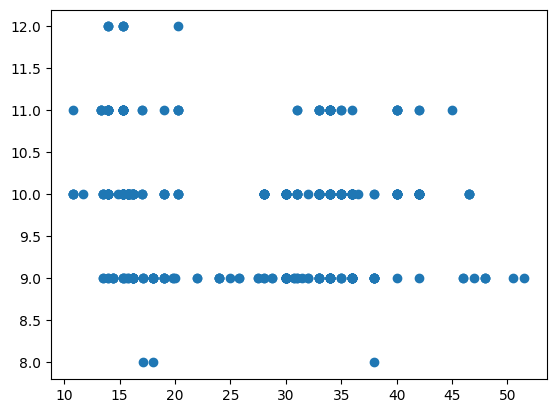

In [31]:
average_price = new_pumpkins['Average Price']
month = new_pumpkins['Month']
plt.scatter(average_price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Average Price')

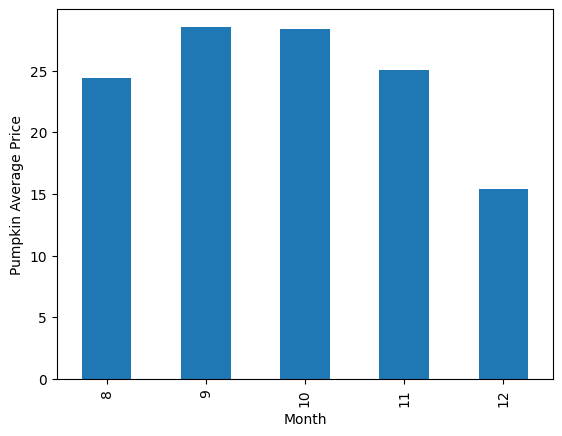

In [32]:
new_pumpkins.groupby(['Month'])['Average Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Average Price")